/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Test accuracy: 0.9674285714285714
[[1325    0    4    0    1    1    3    1    6    2]
 [   0 1576    7    7    2    0    0    5    1    2]
 [   5    3 1341    2    4    1    6    7    8    3]
 [   1    1   20 1362    0   12    2   15   13    7]
 [   2    0    3    1 1251    0    4    3    3   28]
 [   4    3    1   18    3 1225    7    1    9    2]
 [   4    1    0    0    6   10 1371    0    4    0]
 [   2    8   19    0    5    0    0 1452    2   15]
 [   0    6   13   16    6    7    5    4 1291    9]
 [   4    6    5   10   15    5    1   14   10 1350]]


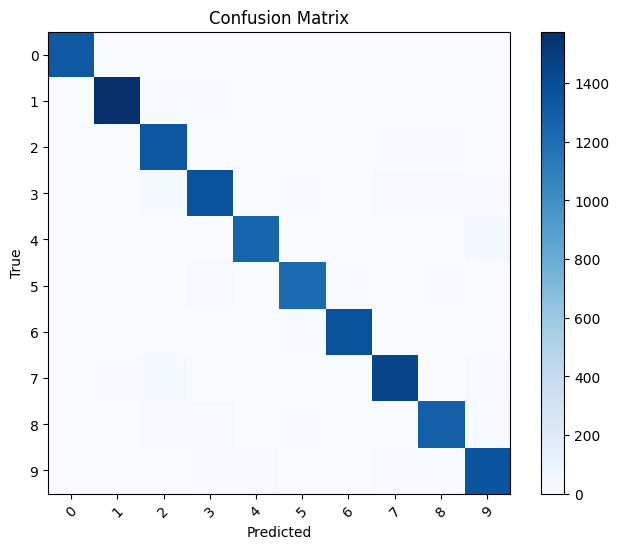


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.95      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



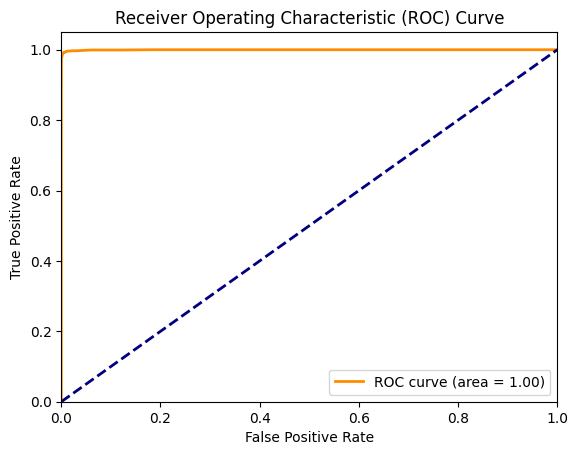

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load the MNIST dataset using scikit-learn
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float32') / 255.0
y = mnist.target.astype('int')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy}')

# Plot the Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, [str(i) for i in range(10)], rotation=45)
plt.yticks(tick_marks, [str(i) for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)]))

# ROC Curve (for binary classification)
# In this example, we'll demonstrate the ROC curve for digit "0" vs. "not 0."
binary_test_labels = np.where(y_test == 0, 1, 0)
y_score = clf.predict_proba(X_test)[:, 0]
fpr, tpr, _ = roc_curve(binary_test_labels, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
